In [2]:
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv

import warnings
warnings.filterwarnings('ignore')

In [91]:
#MAPBOX_TOKEN 
load_dotenv()
mapbox_token = os.getenv("MAPBOX_TOKEN")

In [92]:
#load csv and set year as index
sfo_data = pd.read_csv("Data/sfo_neighborhoods_census_data.csv", index_col="year")
sfo_data.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


In [93]:
# Calculate the mean number of housing units per year # class note 4.2
housing_units = sfo_data.groupby(['year'])['housing_units']
housing_units_mean = housing_units.mean()
housing_units_min = housing_units_mean.min()
housing_units_max = housing_units_mean.max()
housing_units_std = housing_units_mean.std()
housing_units_mean

year
2010    372560
2011    374507
2012    376454
2013    378401
2014    380348
2015    382295
2016    384242
Name: housing_units, dtype: int64

In [47]:
housing_units_min

372560

In [48]:
housing_units_max

384242

In [49]:
housing_units_std

4206.0007132667015

In [23]:
# Save the dataframe as a csv file
housing_units_mean.to_csv("housing_units_mean.csv", index=False)

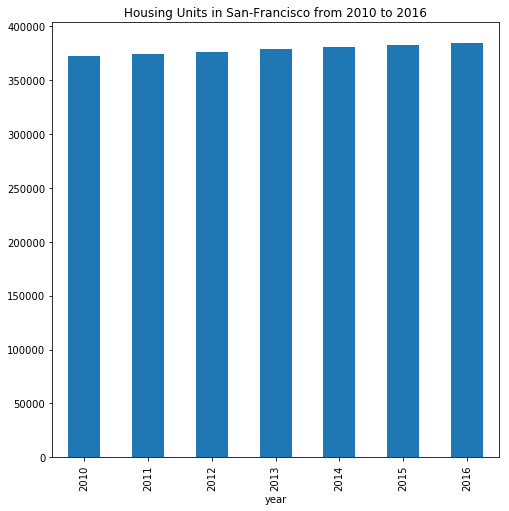

In [53]:
# Use the Pandas plot function to plot the average housing units per year.
housing_units_mean.plot.bar(figsize=(8,8), x='Year', y='Housing Units',title='Housing Units in San-Francisco from 2010 to 2016')

(368353.9992867333, 388448.0007132667)

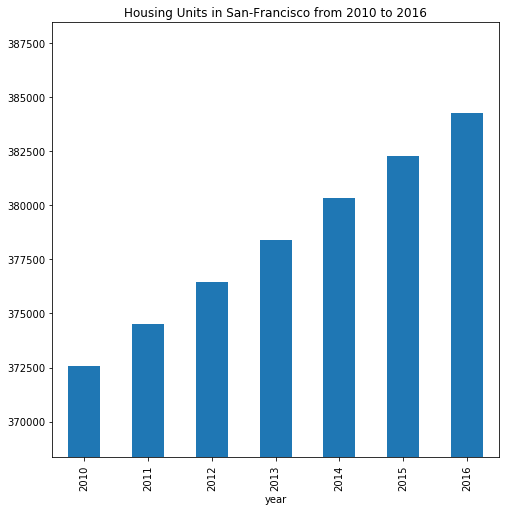

In [58]:
housing_units_mean.plot.bar(figsize=(8,8), x='Year', y='Housing Units',title='Housing Units in San-Francisco from 2010 to 2016')
#google
plt.ylim([housing_units_min-housing_units_std,housing_units_max+housing_units_std])

In [59]:
# Calculate the average sale price per square foot and average gross rent
sfo_avg_price_rent_df = sfo_data[['sale_price_sqr_foot','gross_rent']].groupby(['year'])['sale_price_sqr_foot','gross_rent'].mean()
sfo_avg_price_rent_df

,sale_price_sqr_foot,gross_rent
year,,
2010,369.344353,1239
2011,341.903429,1530
2012,399.389968,2324
2013,483.600304,2971
2014,556.277273,3528
2015,632.540352,3739
2016,697.643709,4390


Text(0, 0.5, 'Gross Rent')

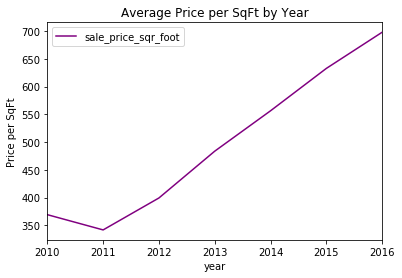

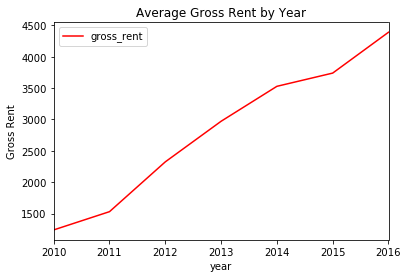

In [96]:
# Create two line charts, one to plot the average sale price per square foot and another for average montly rent

# Line chart for average sale price per square foot
#reset index to make the year as x 
price_plot = sfo_avg_price_rent_df.reset_index().plot(
    x='year', 
    y='sale_price_sqr_foot', 
    title='Average Price per SqFt by Year',
    color='purple')
price_plot.set_ylabel("Price per SqFt")

# Line chart for average montly rent

gross_plot = sfo_avg_price_rent_df.reset_index().plot(
    x='year', 
    y='gross_rent', 
    title='Average Gross Rent by Year',
    color='red'
)
gross_plot.set_ylabel("Gross Rent")

In [63]:
# Group by year and neighborhood and then create a new dataframe of the mean values
sfo_avg_price_by_neighborhood = sfo_data.groupby(['year','neighborhood']).mean().reset_index()
sfo_avg_price_by_neighborhood.head(10)

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182945,372560,1239
1,2010,Anza Vista,267.932583,372560,1239
2,2010,Bayview,170.098665,372560,1239
3,2010,Buena Vista Park,347.394919,372560,1239
4,2010,Central Richmond,319.027623,372560,1239
5,2010,Central Sunset,418.172493,372560,1239
6,2010,Corona Heights,369.359338,372560,1239
7,2010,Cow Hollow,569.379968,372560,1239
8,2010,Croker Amazon,165.645730,372560,1239
9,2010,Diamond Heights,456.930822,372560,1239


In [65]:
# Use hvplot to create an interactive line chart of the average monthly rent. # class note 6.1
sfo_avg_price_by_neighborhood.hvplot.line(
    "year",
    "sale_price_sqr_foot",
    xlabel= "Year",
    ylabel="Avg. Sale Price per Square Foot",
    groupby="neighborhood",
)

:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)

In [67]:
# Use hvplot to create an interactive line chart of the average monthly rent.
sfo_avg_price_by_neighborhood.hvplot.line(
    "year",
    "gross_rent",
    xlabel= "Year",
    ylabel="Avg. Gross Rent",
    groupby="neighborhood",
)

:DynamicMap   [neighborhood]
   :Curve   [year]   (gross_rent)

In [70]:
# Getting the data from the top 10 expensive neighborhoods to own
top10_neighborhoods = sfo_data.groupby(['neighborhood']).mean()
top10_neighborhoods.sort_values(['sale_price_sqr_foot'], ascending=False, inplace=True)
top10_neighborhoods = top10_neighborhoods.reset_index().head(10)
top10_neighborhoods

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Union Square District,903.993258,377427.50,2555.166667
1,Merced Heights,788.844818,380348.00,3414.000000
2,Miraloma Park,779.810842,375967.25,2155.250000
3,Pacific Heights,689.555817,378401.00,2817.285714
4,Westwood Park,687.087575,382295.00,3959.000000
5,Telegraph Hill,676.506578,378401.00,2817.285714
6,Presidio Heights,675.350212,378401.00,2817.285714
7,Cow Hollow,665.964042,378401.00,2817.285714
8,Potrero Hill,662.013613,378401.00,2817.285714
9,South Beach,650.124479,375805.00,2099.000000


In [115]:
# Plotting the data from the top 10 expensive neighborhoods
top10_neighborhoods.hvplot.bar(
    "neighborhood",
    "sale_price_sqr_foot",
    title="Top 10 Expensive Neighborhoods in SFO",
    xlabel="Neighborhood",
    ylabel="Avg. Sale Price per Square Foot",
    height=500,
    rot=90
).opts(yformatter="%.0f")

:Bars   [neighborhood]   (sale_price_sqr_foot)

In [72]:
# Fetch the previously generated DataFrame that was grouped by year and neighborhood
sfo_avg_price_by_neighborhood.head(10)

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182945,372560,1239
1,2010,Anza Vista,267.932583,372560,1239
2,2010,Bayview,170.098665,372560,1239
3,2010,Buena Vista Park,347.394919,372560,1239
4,2010,Central Richmond,319.027623,372560,1239
5,2010,Central Sunset,418.172493,372560,1239
6,2010,Corona Heights,369.359338,372560,1239
7,2010,Cow Hollow,569.379968,372560,1239
8,2010,Croker Amazon,165.645730,372560,1239
9,2010,Diamond Heights,456.930822,372560,1239


In [79]:
sfo_avg_price_by_neighborhood.hvplot.bar(
    x='year', 
    y=['sale_price_sqr_foot', 'gross_rent'], 
    xlabel='Year', 
    ylabel='Avg price, Gross rent', 
    groupby='neighborhood', 
    rot=90, 
    width=700, 
    height=500
).opts(yformatter="%.0f")

:DynamicMap   [neighborhood]
   :Bars   [year,Variable]   (value)

In [80]:
# Load neighborhoods coordinates data
coordinates_df = pd.read_csv("Data/neighborhoods_coordinates.csv")
coordinates_df.head()

,Neighborhood,Lat,Lon
0,Alamo Square,37.791012,-122.402100
1,Anza Vista,37.779598,-122.443451
2,Bayview,37.734670,-122.401060
3,Bayview Heights,37.728740,-122.410980
4,Bernal Heights,37.728630,-122.443050


In [86]:
# Calculate the mean values for each neighborhood
neighborhood_mean_df = sfo_data.groupby(['neighborhood']).mean().reset_index()
neighborhood_mean_df.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,366.020712,378401.0,2817.285714
1,Anza Vista,373.382198,379050.0,3031.833333
2,Bayview,204.588623,376454.0,2318.400000
3,Bayview Heights,590.792839,382295.0,3739.000000
4,Bernal Heights,576.746488,379374.5,3080.333333


In [90]:
# Join the average values with the neighborhood locations # class note 4.2
combined_df = pd.concat([neighborhood_mean_df, coordinates_df], axis='columns', join='inner')
combined_df = combined_df.dropna()
combined_df.drop(columns=['Neighborhood'], inplace=True)
combined_df.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent,Lat,Lon
0,Alamo Square,366.020712,378401.0,2817.285714,37.791012,-122.402100
1,Anza Vista,373.382198,379050.0,3031.833333,37.779598,-122.443451
2,Bayview,204.588623,376454.0,2318.400000,37.734670,-122.401060
3,Bayview Heights,590.792839,382295.0,3739.000000,37.728740,-122.410980
4,Bernal Heights,576.746488,379374.5,3080.333333,37.728630,-122.443050


In [97]:
# Set the mapbox access token
px.set_mapbox_access_token(mapbox_token)

In [191]:
# Create a scatter mapbox to analyze neighborhood info
# stackoverflow helped for color change
map_plot = px.scatter_mapbox(
    combined_df,
    lat="Lat",
    lon="Lon",
    size="sale_price_sqr_foot",
    color="gross_rent",
    color_continuous_scale=px.colors.cyclical.IceFire,
    hover_name="neighborhood",
    title="Averange Sale Price Per Square Foot and Gross Rent in San Francisco",
    zoom=11
)
map_plot.show()

In [168]:
# Fetch the data from all expensive neighborhoods per year.
df_expensive_neighborhoods_per_year = sfo_avg_price_by_neighborhood[sfo_avg_price_by_neighborhood["neighborhood"].isin(top10_neighborhoods["neighborhood"])]
df_expensive_neighborhoods_per_year.head(10)

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
7,2010,Cow Hollow,569.379968,372560,1239
31,2010,Miraloma Park,680.608729,372560,1239
41,2010,Pacific Heights,496.516014,372560,1239
46,2010,Potrero Hill,491.450004,372560,1239
47,2010,Presidio Heights,549.417931,372560,1239
49,2010,South Beach,1037.099789,372560,1239
52,2010,Telegraph Hill,524.793509,372560,1239
54,2010,Union Square District,569.193448,372560,1239
67,2011,Cow Hollow,390.595653,374507,1530
89,2011,Miraloma Park,414.676065,374507,1530


In [189]:
plot = px.parallel_categories(
    top10_neighborhoods,
    dimensions=['neighborhood', 'sale_price_sqr_foot', 'housing_units', 'gross_rent'],
    color='sale_price_sqr_foot',
    color_continuous_scale=px.colors.sequential.Inferno,
    labels={
        'neighborhood': 'neighborhood',
        'sale_price_sqr_foot': 'sale_price_sqr_foot',
        'housing_units': 'housing_units',
        'gross_rent': 'gross_rent'
    },
    width=1000,
)
plot.show()

In [190]:
# Parallel Categories Plot
px.parallel_coordinates(
    top10_neighborhoods, 
    color='sale_price_sqr_foot',
    title = 'Parallel Coordinates Plot of Most Expensive Neighborhoods in San Francisco per Year'
)

In [175]:
px.sunburst(
    df_expensive_neighborhoods_per_year, 
    path=['year','neighborhood'], 
    color='gross_rent', 
    color_continuous_scale='RdBu',
    title = 'Costs Analysis of Most Expensive Neighborhoods in San Francisco per Year'
)